In [2]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import os
from matplotlib.collections import PolyCollection

In [8]:

os.chdir(os.listdir()[0])

In [10]:
os.listdir()

['br3_500_100K_100uW.txt',
 'br3_500_101K_100uW.txt',
 'br3_500_10K_100uW.txt',
 'br3_500_130K_100uW.txt',
 'br3_500_153K_100uW.txt',
 'br3_500_23K_100uW.txt',
 'br3_500_4K_100uW.txt',
 'br3_500_60K_100uW.txt',
 'br3_500_80K_100uW.txt',
 'br3_500_84K_100uW.txt']

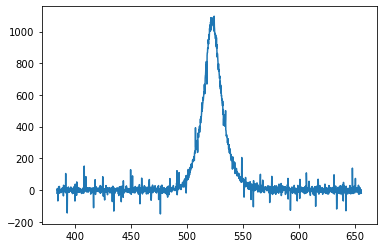

In [11]:
df = pd.read_csv(os.listdir()[0], delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])
plt.plot(df.iloc[:,0],df.iloc[:,1])

In [12]:
f = os.listdir()[0]
f = 'br3_500_100K_100uW.txt'
f = f.strip('br3_500_')
f = f.rstrip('_100uW.txt')
f = f.strip('K')
print(f)

100


Text(0.5, 1.0, 'temp_run')

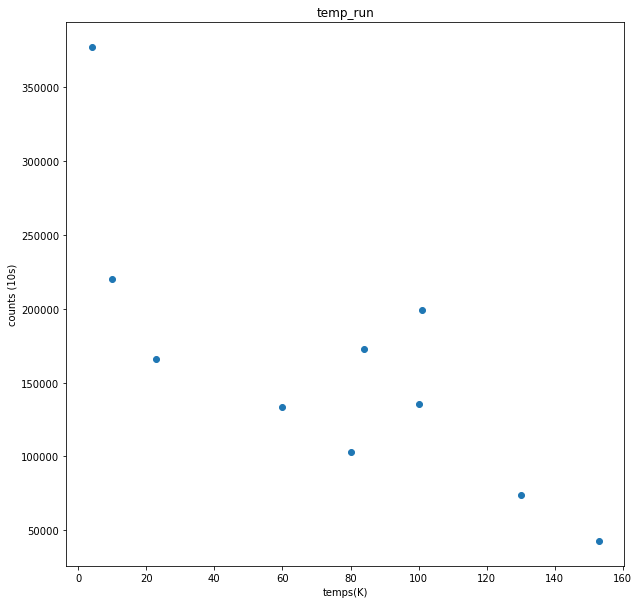

In [13]:
xmin = 480
xmax = 560
powers = []
power_counts = []
for file in os.listdir():
    df = pd.read_csv(file, delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])
    x1 = df.columns[0]
    y1 = df.columns[1]
    w = df[x1]
    c = df[y1]
    mask = (w>xmin)&(w<xmax)
    p = np.sum(c[mask])
    power_counts.append(p)
    file = file.strip('br3_500_')
    file = file.rstrip('_100uW.txt')
    file = file.strip('K')
    power = file
    powers.append(power)
p_s = (np.array(powers)).astype(int)
c_s = np.array(power_counts)
fig = plt.figure(figsize = (10,10))
plt.plot(p_s, c_s,'o',label='power_run')
plt.xlabel('temps(K)')
plt.ylabel('counts (10s)')
plt.title('temp_run')


(490.0, 540.0)

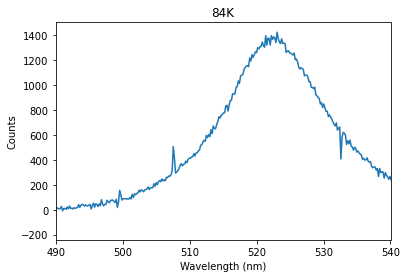

In [15]:
x1 = df.columns[0]
y1 = df.columns[1]
plt.plot(df[x1],df[y1])
plt.xlabel(x1)
plt.ylabel(y1)
plt.title(power+'K')
xmin = 490
xmax = 540
plt.xlim(xmin,xmax)

[(480.0, 560.0),
 (153.0, 1.0),
 (0.0, 3000.0),
 Text(0.5, 0, 'Wavelength(nm)'),
 Text(0.5, 0, 'PL intensity (a.u)'),
 Text(0.5, 0.5, 'Temperature (K)')]

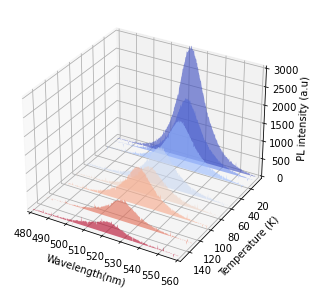

In [67]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
datas = []
xmin = 480
xmax = 560
ps = p_s

ax.invert_yaxis()
exclusions = [101,84]
for i in exclusions:
    ps = ps[ps != i]
ps.sort() 
ps = ps[0:]

for z in ps:
    df = pd.read_csv('br3_500_'+str(z)+'K_100uW.txt', delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])
    w = df.iloc[:,0]
    c = df.iloc[:,1]
    mask = (w>xmin)&(w<xmax)
    dat = datas.append([*zip(w[mask], c[mask])])
facecolors = plt.colormaps['coolwarm'](np.linspace(0, 1, len(datas)))
poly = PolyCollection(datas,facecolor = facecolors, alpha=.6)
ax.add_collection3d(poly, zs=ps, zdir='y')
ax.text(500, 1500, 80, 'matplotlib', horizontalalignment='center',
     verticalalignment='center')
ax.set(xlim=(xmin, xmax), ylim=(max(ps),1),zlim=(0,3000),xlabel = 'Wavelength(nm)', zlabel = 'PL intensity (a.u)', ylabel = 'Temperature (K)')


ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (824, 3).

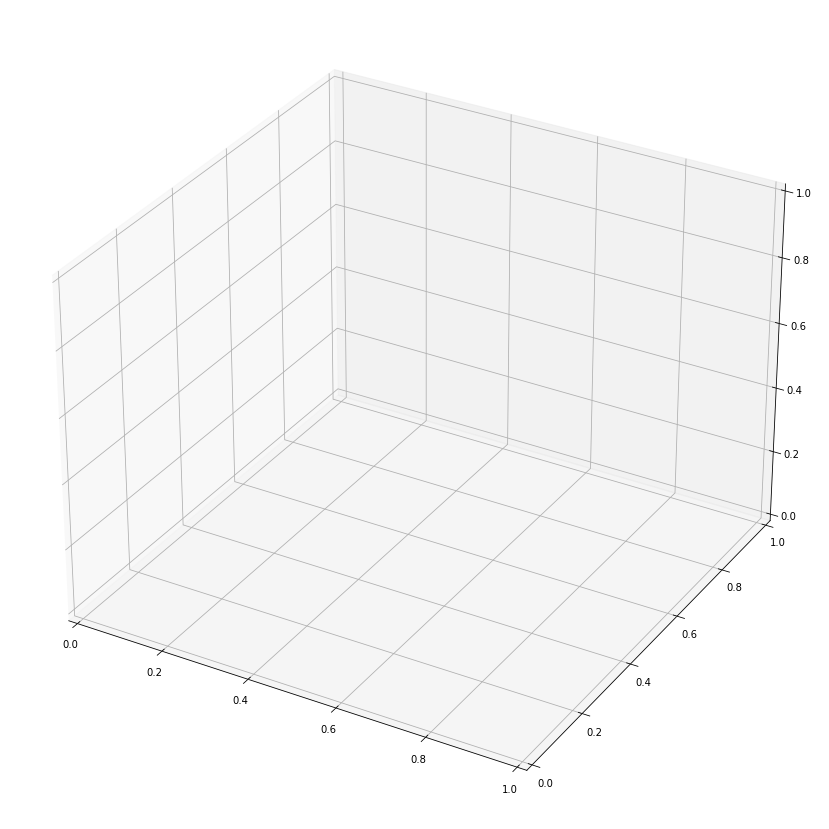

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

# Plot your data here
datas = []
xmin = 460
xmax = 600
ps = p_s
exclusions = [101,84]
for i in exclusions:
    ps = ps[ps != i]
ps.sort() 
ps = ps[0:]
for i, z in enumerate(reversed(ps)):
    df = pd.read_csv('br3_500_'+str(z)+'K_100uW.txt', delim_whitespace=True, header=None, names=['Wavelength (nm)', 'Counts'])
    w = df.iloc[:,0]
    c = df.iloc[:,1]
    mask = (w>xmin)&(w<xmax)
    dat = datas.append([*zip(w[mask], c[mask], [i]*sum(mask))])
facecolors = plt.colormaps['coolwarm'](np.linspace(0, 1, len(datas)))
poly = PolyCollection(datas, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=range(len(datas)), zdir='y')

# Set the temperature axis limits and label
ax.set(xlim=(xmin, xmax), ylim=(0, len(datas)-1), zlim=(0, 2000), xlabel='Wavelength (nm)', zlabel='Counts', ylabel='Temperature (K)')

# Reverse the temperature axis label
ax.set_yticklabels(reversed(ps))

# Show the plot
plt.show()


In [30]:
a = '1b.2c'


In [47]:
a.strip('1''.2c')

'b'

In [32]:
a


'1b.2c'